In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/snkn1959/data_source/main/customer_pca.csv')
data 

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038,3
96,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166,0
97,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335,0
98,-0.940815,-0.807895,-1.093267,-1.342878,-0.676572,-1.287731,-1.305887,-1.463747,-1.050452,-0.895722,-0.708094,0.954537,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      100 non-null    float64
 1   category_entertainment   100 non-null    float64
 2   category_food_dining     100 non-null    float64
 3   category_gas_transport   100 non-null    float64
 4   category_grocery         100 non-null    float64
 5   category_health_fitness  100 non-null    float64
 6   category_home            100 non-null    float64
 7   category_kids_pets       100 non-null    float64
 8   category_misc            100 non-null    float64
 9   category_personal_care   100 non-null    float64
 10  category_shopping        100 non-null    float64
 11  category_travel          100 non-null    float64
 12  label                    100 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [5]:
data['label'].value_counts()

label
0    44
3    38
2    10
1     8
Name: count, dtype: int64

In [6]:
X = data.drop('label', axis=1)
y = data['label']

PCA를 이용해 11개의 변수를 2개로 축소

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [9]:
X.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


In [12]:
X_pca = pd.DataFrame(X_pca, columns=['comp1', 'comp2'])
X_pca

,comp1,comp2
0,-3.929061,0.102604
1,3.107583,-1.748879
2,3.023793,3.212212
3,-4.282418,0.011378
4,2.590658,-1.906121
...,...,...
95,3.057868,-2.070061
96,-1.980872,-0.185124
97,-3.465385,1.022298
98,-3.277164,1.392480


In [14]:
y

0     0
1     3
2     1
3     0
4     3
     ..
95    3
96    0
97    0
98    0
99    3
Name: label, Length: 100, dtype: int64

In [15]:
customer_pca = pd.concat([X_pca, y], axis=1)
customer_pca

,comp1,comp2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3
...,...,...,...
95,3.057868,-2.070061,3
96,-1.980872,-0.185124,0
97,-3.465385,1.022298,0
98,-3.277164,1.392480,0


<Axes: xlabel='comp1', ylabel='comp2'>

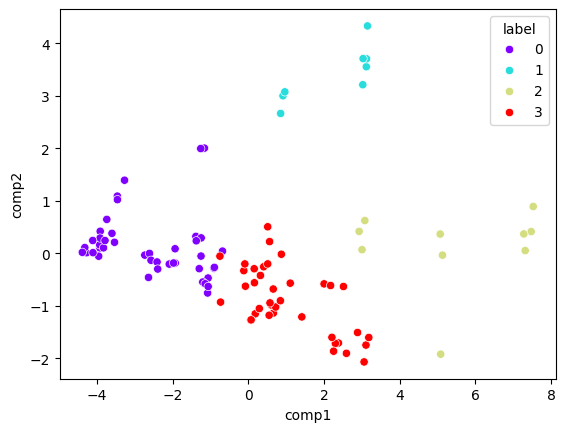

In [18]:
sns.scatterplot(x='comp1', y='comp2', data=customer_pca, hue='label', palette='rainbow')

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=8)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.4, stratify=y, random_state=8)

In [34]:
X_train.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
59,-0.832572,-0.793244,-0.627964,-0.263296,-0.650104,-0.716979,-1.070153,-0.754897,-0.635743,-0.676317,-0.798371,-0.260635
25,-0.360646,-0.268862,-0.666773,-0.038531,-0.544580,-0.077624,0.138012,-0.206653,-0.031071,-0.590655,-0.144615,-0.511340
52,1.824176,1.507748,1.451004,-0.773011,2.631069,0.972179,0.890949,1.267029,1.323011,2.612661,2.467097,-0.601525
28,1.240326,0.957741,1.541863,-0.695536,0.503220,1.455784,2.254977,0.422934,-0.268639,0.157460,1.065875,3.204754
71,-1.228270,-1.202879,-0.797063,-0.910078,-1.000843,-1.628543,-1.367503,-0.944949,-1.081349,-1.153923,-1.311842,0.450810


In [35]:
X_train_pca.head()

,comp1,comp2
59,-2.417121,-0.165314
25,-0.913414,-0.284251
52,5.132072,-0.035501
28,3.116833,3.555122
71,-3.746340,0.645711


In [36]:
dtc1 = DecisionTreeClassifier(max_depth=3, random_state=8)
dtc1.fit(X_train, y_train)
pred1 = dtc1.predict(X_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         4
           3       1.00      0.93      0.97        15

    accuracy                           0.93        40
   macro avg       0.89      0.96      0.91        40
weighted avg       0.94      0.93      0.93        40



In [43]:
result = pd.DataFrame(dtc1.feature_importances_, index=dtc1.feature_names_in_)
result.sort_values(by=0, ascending=False)

,0
amt,0.572055
category_shopping,0.255280
category_misc,0.123393
category_kids_pets,0.049272
category_entertainment,0.000000
category_food_dining,0.000000
category_gas_transport,0.000000
category_grocery,0.000000
category_health_fitness,0.000000
category_home,0.000000


In [37]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=8)
dtc2.fit(X_train_pca, y_train_pca)
pred2 = dtc2.predict(X_test_pca)
print(classification_report(y_test_pca, pred2))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         4
           3       1.00      0.80      0.89        15

    accuracy                           0.90        40
   macro avg       0.88      0.94      0.88        40
weighted avg       0.95      0.90      0.91        40



# 4297개의 컬럼 데이터를 PCA로 축소해 분석하기

In [44]:
data = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv')

In [45]:
data.head()

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.25777,0.12220,0.348620,0.12957,0.43846,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15316,0.14062,-0.030201,0.10134,-0.14546,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.40122,0.13790,0.138350,0.15746,0.51216,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15587,-0.26686,0.158930,-0.13204,0.32221,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,0.24020,0.44605,-0.163560,0.45311,0.59073,0.356800,0.395780,0.035871,-0.293430,0.38124


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 4297 entries, class to V4296
dtypes: float64(4283), int64(14)
memory usage: 655.7 MB


In [54]:
(data.isna().sum() != 0).sum()

0

In [55]:
data['class'].value_counts()

class
0    15000
1     5000
Name: count, dtype: int64

In [56]:
X = data.drop('class', axis=1)
y = data['class']

In [57]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,-0.603748,-0.611584,-0.090498,-0.39686,-0.594624,-0.432352,-0.351344,-0.032746,0.397594,-0.512121,...,0.171945,0.332169,1.290402,0.499449,1.169433,-0.975917,0.414786,0.898416,0.744553,0.084744
1,-0.603748,-0.611584,-0.090498,-0.39686,-0.594624,-0.432352,-0.351344,-0.032746,0.397594,-0.512121,...,0.748805,0.428825,-0.820779,0.334597,-2.395861,-1.291476,1.944271,-0.609807,1.092683,0.594011
2,-0.603748,-0.611584,-0.090498,-0.39686,-0.594624,-0.432352,-0.351344,-0.032746,0.397594,-0.512121,...,-0.619092,0.414552,0.118561,0.662315,1.619429,-2.174376,0.089894,0.155714,-0.089064,-0.252646
3,-0.603748,-0.611584,-0.090498,-0.39686,-0.594624,-0.432352,-0.351344,-0.032746,0.397594,-0.512121,...,0.733861,-1.709363,0.233254,-1.028246,0.459634,-0.621045,2.995809,2.006164,-2.272945,-0.007612
4,-0.603748,-0.611584,-0.090498,-0.39686,-0.594624,-0.432352,-0.351344,-0.032746,0.397594,-0.512121,...,2.917941,2.031521,-1.563993,2.388789,2.099161,1.525847,1.913341,-0.607258,-0.682016,0.929715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.600179,-0.342705,-0.595098,-0.39686,0.137650,-0.432352,0.224434,0.768955,-0.507695,-0.397147,...,1.087139,-0.477255,0.628382,-0.769646,0.183225,-2.128681,-0.602641,-1.633488,0.733321,-0.460476
19996,-0.603748,1.596381,1.021972,-0.39686,-0.594624,-0.432352,-0.081903,-0.530124,-0.507695,-0.512121,...,-0.442081,-2.326870,-0.379802,1.982938,0.164725,-0.579339,-1.783600,-0.710806,2.792948,0.265106
19997,-0.603748,1.339291,0.250288,-0.39686,0.268311,-0.432352,-0.191328,-0.591302,-0.507695,-0.512121,...,-0.597972,1.358077,-1.852230,1.082940,-0.343399,0.459575,0.737133,0.310299,1.446200,-0.756202
19998,-0.400553,-0.569838,0.758906,-0.39686,0.804366,2.136898,0.258657,-0.161961,-0.507695,-0.512121,...,-0.440482,-1.735075,-0.691034,-1.630541,0.616065,2.480760,1.995371,0.121923,-0.180422,-0.211526


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=10)

In [61]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      6011
           1       0.73      0.40      0.52      1989

    accuracy                           0.81      8000
   macro avg       0.78      0.68      0.70      8000
weighted avg       0.80      0.81      0.79      8000



In [63]:
result = pd.DataFrame(dtc.feature_importances_, index=dtc.feature_names_in_)
result.sort_values(by=0, ascending=False)

,0
V4232,0.169200
V4226,0.135523
V4230,0.109911
V4184,0.090788
V4252,0.074895
...,...
V1440,0.000000
V1441,0.000000
V1442,0.000000
V1443,0.000000


In [65]:
len(result[result[0] > 0])

27

In [66]:
result[result[0] > 0]

,0
V35,0.009752
V491,0.009080
V759,0.008652
V3278,0.001297
V3620,0.001308
V4115,0.005266
V4132,0.013003
V4134,0.034306
V4140,0.052667
V4153,0.013917


In [67]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

In [70]:
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-13.062844,1.184111,0.875505,-5.135277,0.284351,7.814576,10.607252,7.282235,-13.403448,13.811143,-4.172553,12.882133,-6.294245,-2.404156,-1.166102,2.378801,-0.569552,-4.481379,-2.431980,-4.335711
1,-13.304040,0.939219,0.730716,-5.193055,0.433766,7.547857,10.612480,7.283015,-13.447651,13.687120,-4.402339,13.090084,-6.482372,-2.272974,-1.168909,2.426985,-0.712576,-4.390843,-2.446661,-4.411190
2,-12.936643,0.892121,0.991511,-5.270221,0.347925,7.684117,10.583799,7.344644,-13.489220,13.911163,-4.174197,12.938818,-6.330087,-2.410863,-1.328572,2.418343,-0.654491,-4.384484,-2.685329,-4.344053
3,-13.366895,0.912050,0.470649,-4.999932,0.370202,7.709536,10.559943,7.225527,-13.739731,13.793955,-4.455626,13.032787,-6.537020,-2.255856,-1.232422,2.278996,-0.731980,-4.484540,-2.371570,-4.504565
4,-13.376073,1.020697,1.070249,-5.193197,0.635034,8.042555,10.540791,7.333861,-13.427903,13.630857,-4.470313,13.170747,-6.477882,-2.565316,-1.303634,2.340405,-0.700243,-4.438373,-2.607032,-4.314102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,23.692450,43.744117,4.008873,6.890845,-16.408798,-7.874187,9.226959,-5.314634,11.261933,-5.949467,1.699733,-16.429531,-15.051408,-11.913896,-8.015070,0.806075,-6.801162,-7.700325,-8.143760,-5.658170
19996,30.164864,44.587722,8.161992,5.629500,-16.351703,-12.578125,14.634686,-4.600212,3.552649,-2.861439,7.680245,-14.088207,-15.429113,-1.812636,-16.807597,-3.338795,2.784107,1.305452,-1.368787,-4.071533
19997,-25.498935,5.659436,4.316534,-26.088141,2.076300,-7.043322,-0.382296,-16.885741,-7.893900,-3.191138,3.449907,-10.491008,1.304706,9.015714,1.598373,-4.842571,4.602304,-4.005179,18.846973,1.366151
19998,11.626723,16.899303,3.698685,-0.002671,2.533101,-13.100734,3.721403,6.632023,4.798108,0.010022,5.717643,-3.402430,-1.686453,-5.133363,-5.942030,1.990785,2.337184,-0.475619,-2.248405,0.514925


In [71]:
print(pca.explained_variance_)

[213.96963517 141.71255526 124.564479   110.38529284  95.79539199
  82.86964662  72.8723669   68.95989366  63.40867297  58.32521806
  55.94320324  53.61304872  49.45275498  47.70675339  46.27546994
  44.31632101  42.53310905  39.18006206  38.00380991  36.20741188]


In [72]:
print(pca.explained_variance_ratio_)

[0.04995539 0.03308556 0.02908201 0.0257716  0.02236531 0.01934754
 0.01701348 0.01610003 0.01480399 0.01361716 0.01306103 0.01251701
 0.01154571 0.01113807 0.01080391 0.01034651 0.00993019 0.00914735
 0.00887273 0.00845333]


In [82]:
print(pca.explained_variance_ratio_.sum())

0.34695792479451


In [73]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.4, random_state=10)

In [77]:
dtc2 = DecisionTreeClassifier(max_depth=5, random_state=8)
dtc2.fit(X_train_pca, y_train_pca)
pred2 = dtc2.predict(X_test_pca)
print(classification_report(y_test_pca, pred2))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      6011
           1       0.79      0.18      0.29      1989

    accuracy                           0.78      8000
   macro avg       0.79      0.58      0.58      8000
weighted avg       0.78      0.78      0.73      8000



In [79]:
result2 = pd.DataFrame(dtc2.feature_importances_)
result2.sort_values(by=0, ascending=False)

,0
4,0.167619
7,0.143368
18,0.118186
8,0.088347
5,0.072831
2,0.070345
10,0.069638
1,0.068182
14,0.054110
17,0.040250


In [81]:
len(result2[result2[0] > 0])

14

In [80]:
result2[result2[0] > 0]

,0
0,0.029786
1,0.068182
2,0.070345
3,0.022567
4,0.167619
5,0.072831
7,0.143368
8,0.088347
10,0.069638
12,0.015279


In [108]:
pca = PCA(10)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

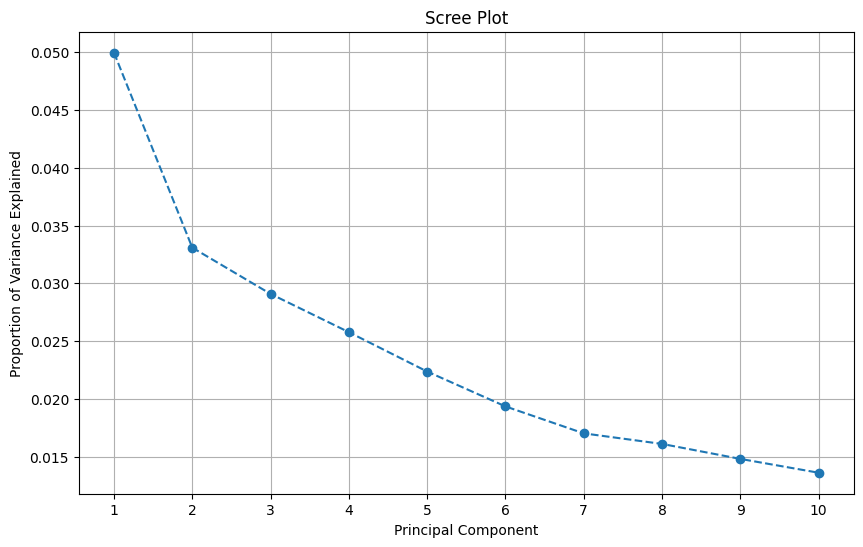

Optimal number of components: 1


In [109]:
# 주성분의 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()

# 누적 분산 비율 계산
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 최적의 주성분 개수 찾기 (예: 80% 이상의 분산을 설명하는 주성분 개수)
optimal_components = np.argmax(cumulative_variance_ratio >= 0.80) + 1
print(f'Optimal number of components: {optimal_components}')

In [110]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.4, random_state=10)

In [111]:
dtc2 = DecisionTreeClassifier(max_depth=5, random_state=8)
dtc2.fit(X_train_pca, y_train_pca)
pred2 = dtc2.predict(X_test_pca)
print(classification_report(y_test_pca, pred2))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      6011
           1       0.72      0.14      0.24      1989

    accuracy                           0.77      8000
   macro avg       0.75      0.56      0.55      8000
weighted avg       0.76      0.77      0.71      8000



In [112]:
result2 = pd.DataFrame(dtc2.feature_importances_)
result2.sort_values(by=0, ascending=False)

,0
4,0.298961
9,0.160092
5,0.117895
7,0.115440
3,0.104988
8,0.088860
1,0.045030
2,0.032612
0,0.021696
6,0.014427
